## 탐색적 분석
+ exploratory data analysis
+ 본격적인 데이터 분석전에 데이터의 각 컬럼에 대한 이해와
+ 데이터의 결측치, 이상치 처리 및 필터링을 수행하고
+ 누구나 이해하기 쉬운 시각화를 수행하는 과정

### miniconda 로 패키지 설치
* chmod 777 -R /opt/miniconda3

In [1]:
# 데이터 분석도구 1: pandas
# 데이터 분석도구 2: matplotlib
# 데이터 분석도구 3: seaborn

!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 소수점 자리 지정(float을 출력 할때 소수점 2번째 자리까지 출력하겠다!)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## iris EDA

In [4]:
iris = spark.read.csv('data/iris.csv', header = True, inferSchema=True)

In [5]:
iris.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



### Spark 데이터프레임을 pandas 객체로 변환
* 객체명.toPandas

In [6]:
iris2 = iris.toPandas()

In [7]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


### 요약

In [8]:
iris.summary().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [9]:
iris2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 간단한 시각화
* plot(x축, y축, 옵션)
* 컬럼명 : 객체명['컬러명'], 객체명.컬럼명

In [15]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

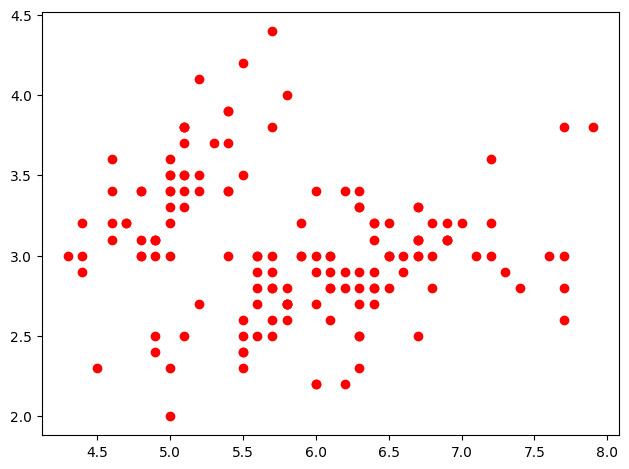

In [11]:
plt.plot(iris2.sepal_length, iris2.sepal_width, 'ro')
plt.tight_layout()

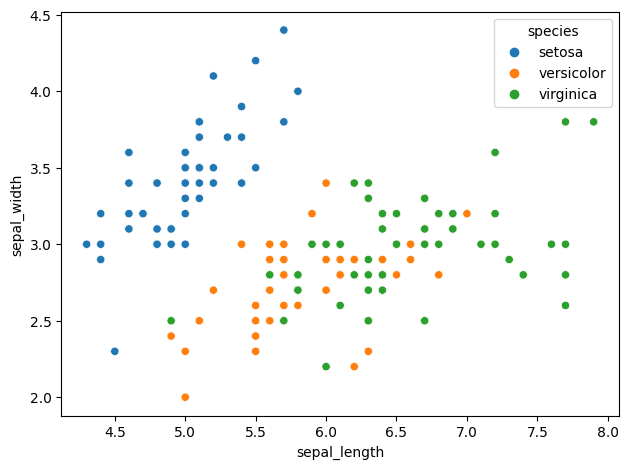

In [12]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris2)
plt.tight_layout()

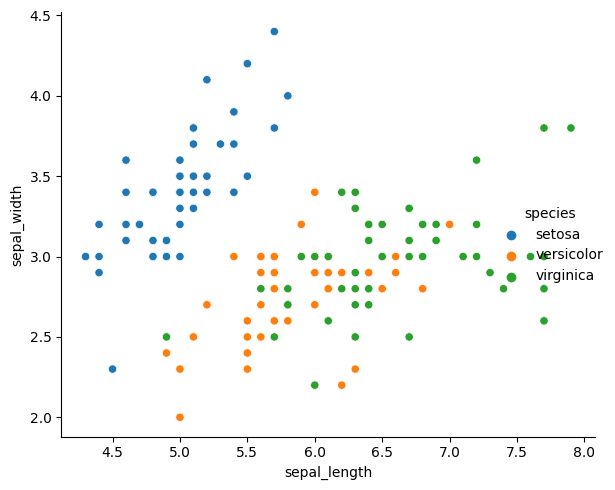

In [16]:
sns.pairplot(iris2, x_vars='sepal_length', y_vars='sepal_width', hue='species', height=5)
plt.tight_layout()

In [17]:
#  상관계수
iris.corr('sepal_length','sepal_width')

-0.10936924995064931

In [18]:
iris.corr('petal_length','petal_width')

0.9627570970509666

In [20]:
iris2.iloc[:, 0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


## tip 데이터 EDA

In [21]:
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


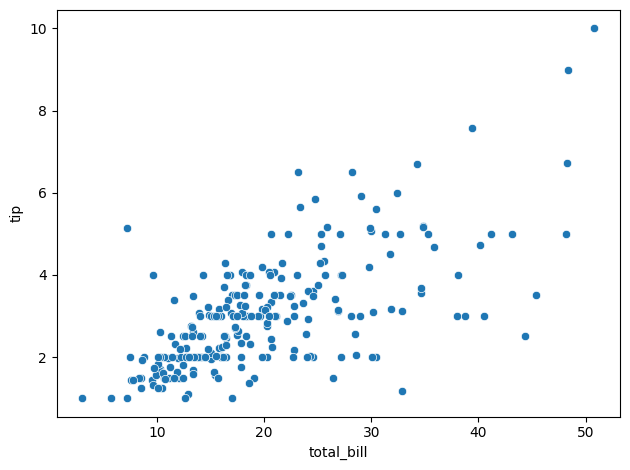

In [24]:
sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.tight_layout()

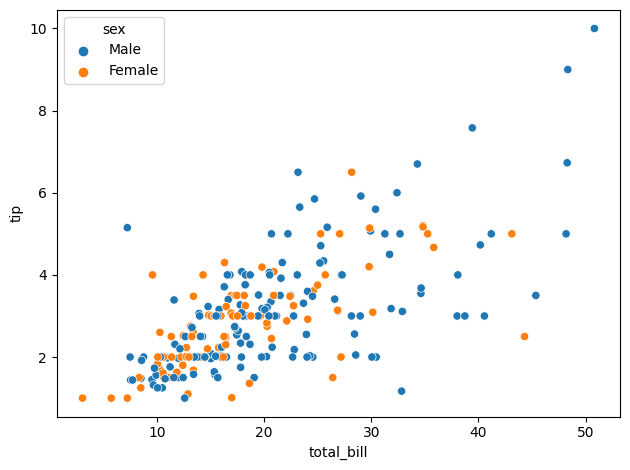

In [25]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=tips)
plt.tight_layout()

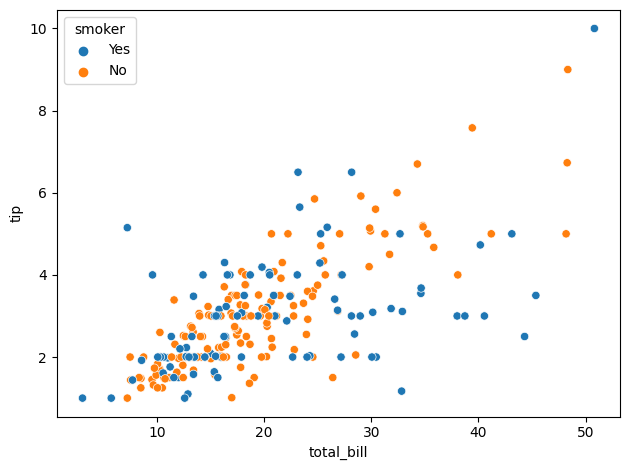

In [26]:
sns.scatterplot(x='total_bill',y='tip',hue='smoker',data=tips)
plt.tight_layout()

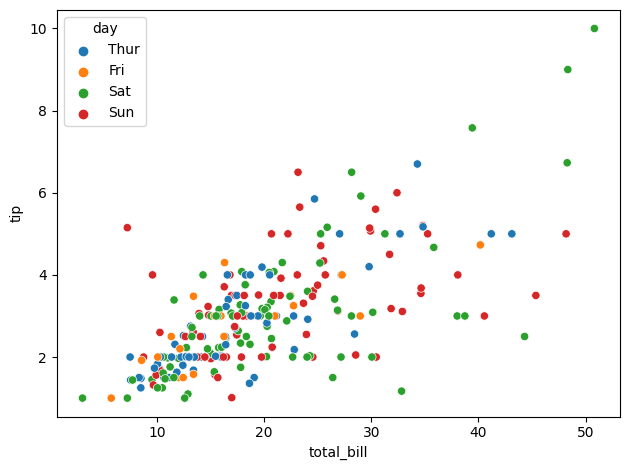

In [27]:
sns.scatterplot(x='total_bill',y='tip',hue='day',data=tips)
plt.tight_layout()

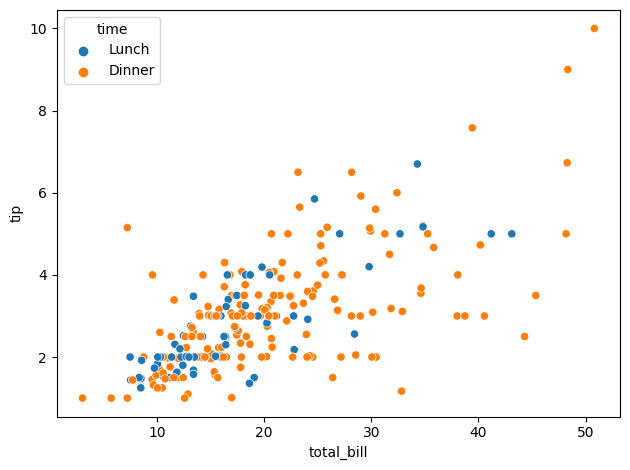

In [28]:
sns.scatterplot(x='total_bill',y='tip',hue='time',data=tips)
plt.tight_layout()

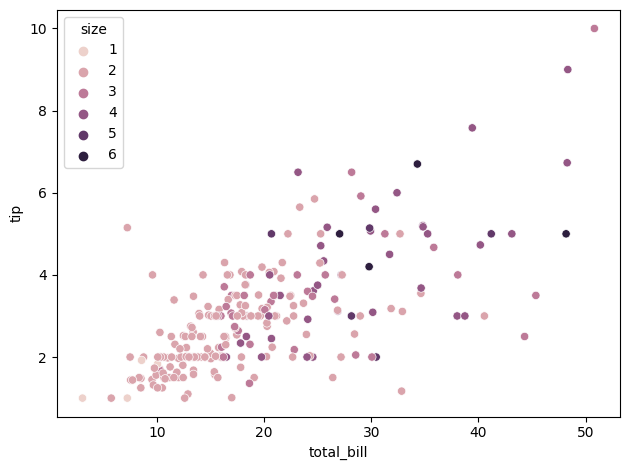

In [29]:
sns.scatterplot(x='total_bill',y='tip',hue='size',data=tips)
plt.tight_layout()

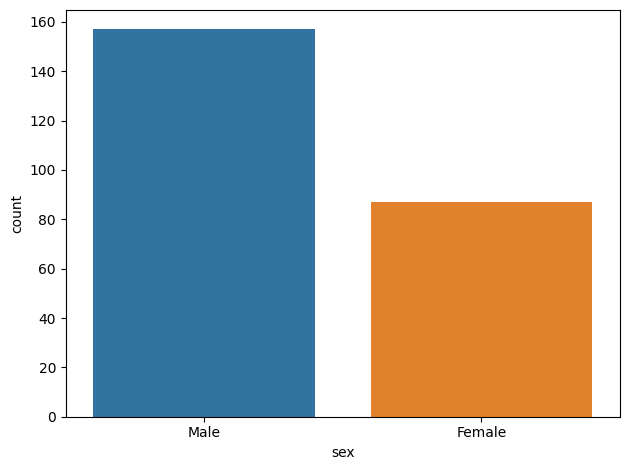

In [30]:
sns.countplot(x='sex', data=tips)
plt.tight_layout()

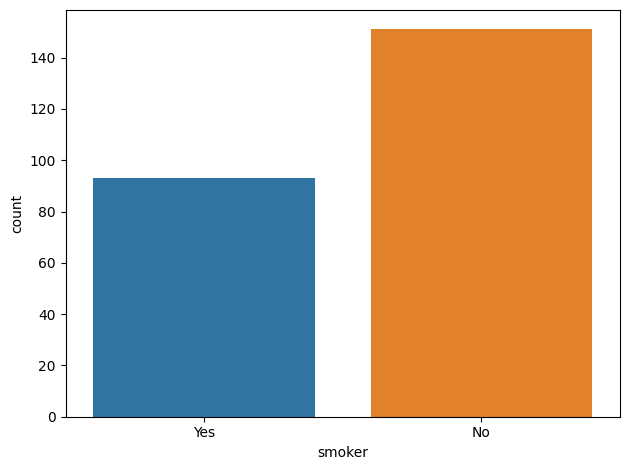

In [31]:
sns.countplot(x='smoker', data=tips)
plt.tight_layout()

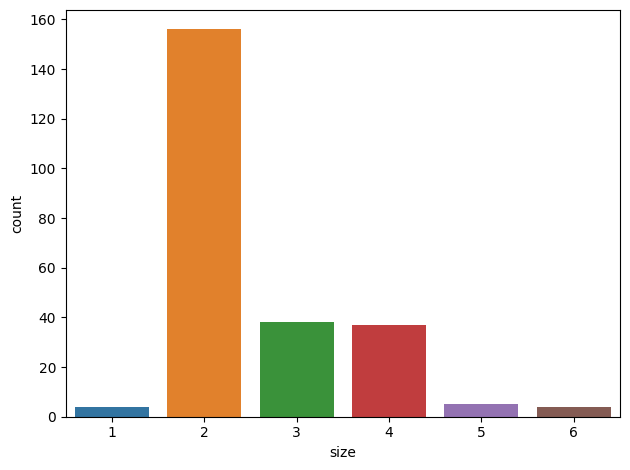

In [32]:
sns.countplot(x='size', data=tips)
plt.tight_layout()